# HISTORICAL PLANE CRASHES - A DATA ANALYSIS 


### INTRODUCTION
Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data. It employs various theories and techniques drawn from several fields such as mathematics, information science, statistics, and computer science. The goal of this tutorial is to walk you through the data science pipeline which consists of : 
#### <font color=green> Data Curation --> Parsing and Management --> Exploratory Data Analysis --> Hypothesis Testing and Machine Learning to Provide Analysis</font>

#### The Data Set
The data set I will be using is called `planecrashinfo_20181121001952.csv`. The data was collected from http://www.planecrashinfo.com/database.htm. I found the data set on Kaggle and all credits go to the owner. You can download the csv file from https://www.kaggle.com/nguyenhoc/plane-crash. The data set mainly includes:
- Civil/commercial aviation accidents which resulted in fatality
- Cargo and test flight fatal accidents
- Military transportation accidents (with 10 or more fatalities)
- Commerical helicopter accidents (10 or more fatalities)
- Aviation accidents involving the death of famous people
- Aviation accidents or incidents of noteworthy interest<br><br>
Every row in the data set corresponds to a historical plane crash. The column features of the data set are explained below:<br><br>
-  <font color=green> Features related to time</font><br>
*Date:* Date of accident,  in the format Month DD, YYYY<br>
*Time:* Local time in 24 hour format unless otherwise specified<br>

-  <font color=green> Features related to the flight</font><br>
*Airline/Op:* Airline or operator of the aircraft<br>
*Flight #:*	Flight number assigned by the aircraft operator<br>
*Route:* Complete or partial route flown prior to the accident<br>
*AC Type:* Aircraft type<br>
*Reg:* ICAO registration of the aircraft<br>
*cn / ln:* Construction or serial number / Line or fuselage number<br>

-  <font color=green> Features related to the fatalities</font><br>
*Aboard:* Total number of passengers and crew aboard<br> 
*Fatalities:* Total fatalities aboard (passengers and crew)<br>
*Ground:* Total killed on the ground<br>

-  <font color=green> Features related to the event</font><br>
*Summary:* Brief description of the accident and cause if known<br>

#### Getting Started
Before we begin to analyze our data, let's make sure you have all the libraries we need. You have to make sure you have python package manager (pip) installed. Instruction on installation can be found on https://pip.pypa.io/en/stable/installing/
Make sure you have the following packages installed: numpy, pandas, folium, sklearn, beautifulsoup, seaborn, statsmodels, matplotlib. You may use Jupyter notebook's terminal to install all the libraries needed.<br>

#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import folium
from datetime import datetime
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap, HeatMapWithTime
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# from yellowbrick.regressor import ResidualsPlot
%matplotlib inline 

### STEP 1: DATA CURATION
First, let's extract the CSV data.<br>

The dataset consists of 5783 plane crashes. It is important to have a manageable sized data frame. If the dataset you are using is huge, you can always trim it accordingly by using just the first x-number of entries.<br>

Let's write a function called read_data that takes the data file path as an argument, uses pandas to read the csv file and outputs the first five entries using head(). The output is our data set in the form of a table with various columns as explained above. 

In [2]:
def read_data(data_path=None):
    '''
    return's dataframe from csvfile
    '''
    if data_path is None:
        raise ValueError('Need csv file path as argument !')
    data = pd.read_csv(data_path)
    data = data.copy()
    return data
data = read_data("planecrashinfo_20181121001952.csv")
data.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


### STEP 2: PARSING AND MANAGEMENT
It is often said that 80% of data analysis is spent on the process of cleaning and preparing
the data (Dasu and Johnson 2003). "The principles of tidy data provide a standard way to organise data values within a dataset."
Cleaning initial data saves us the time to start from scratch. You can find more information about data tidying here: https://vita.had.co.nz/papers/tidy-data.pdf <br>
We want to select the specific columns that add meaning to our data analysis. We don't necesarily need all the columns, e.g, column cn / ln which represents construction or serial number. We can modify "data" to contain only the columns that we need. Let's select those columns and rename them for ease of understanding and readability. We will remove Reg, cn / ln, flight_no, ground because I don't plan to work with them for this tutorial. Our data should look much cleaner after this step.


In [3]:
#Retrieve desirable columns
columns = ['date','time','location','operator','route','ac_type','aboard','fatalities','summary']
data = data[columns]

#Rename columns for readability
new_columns = ['date','time','location','operator','route','aircraft_type','aboard','fatalities','description']
data.columns = new_columns

data.head()

,date,time,location,operator,route,aircraft_type,aboard,fatalities,description
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,Air show,Wright Byplane,1 (passengers:0 crew:1),1 (passengers:0 crew:0),Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,Curtiss seaplane,1 (passengers:0 crew:1),1 (passengers:0 crew:1),The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,?,Zeppelin L-1 (airship),20 (passengers:? crew:?),14 (passengers:? crew:?),The airship flew into a thunderstorm and encou...


In [4]:
#Modifying Faulty Entries

data = data.replace(to_replace='?', value=np.NaN, inplace=False, limit=None, regex=False, method='pad')
data.head()


,date,time,location,operator,route,aircraft_type,aboard,fatalities,description
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1 (passengers:0 crew:1),1 (passengers:0 crew:0),Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1 (passengers:0 crew:1),1 (passengers:0 crew:1),The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20 (passengers:? crew:?),14 (passengers:? crew:?),The airship flew into a thunderstorm and encou...


In [5]:
#Dropping NaN Entries
data = data.dropna()
data = data.reset_index(drop=True)
data.head()

,date,time,location,operator,route,aircraft_type,aboard,fatalities,description
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),"During a demonstration flight, a U.S. Army fly..."
1,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),First U.S. dirigible Akron exploded just offsh...
2,"December 14, 1920",c12:15,"London, England",Handley Page Transport,London - Paris,Handley Page HP-16,8 (passengers:6 crew:2),4 (passengers:2 crew:2),The plane failed to gain altitude after taking...
3,"March 22, 1922",1140,North Atlantic Ocean,Aero Limited,Miami - Bimini,Aeromarine Model 85 (flying boat),6 (passengers:5 crew:1),5 (passengers:5 crew:0),The plane ditched into the ocean about 40 mile...
4,"April 07, 1922",1315,"Grandvilliers, France",Daimler Airways / Grands Express Aeriens,Croydon - Le Bourget,de Havilland DH-18 / Farman F-60 Goliath,7 (passengers:5 crew:2),7 (passengers:5 crew:2),A midair collision occurred at 400 ft. in poor...


In [6]:
data['month'], data['year'] = data['date'].str.split(",").str
data['month'], data['day'] =  data['month'].str.split(" ").str
data['year'] = data['year'].astype(int)
data['day'] = data['day'].astype(int)
data.drop(['date'], axis=1, inplace=True)
data.head(10)

,time,location,operator,route,aircraft_type,aboard,fatalities,description,month,year,day
0,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),"During a demonstration flight, a U.S. Army fly...",September,1908,17
1,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),First U.S. dirigible Akron exploded just offsh...,July,1912,12
2,c12:15,"London, England",Handley Page Transport,London - Paris,Handley Page HP-16,8 (passengers:6 crew:2),4 (passengers:2 crew:2),The plane failed to gain altitude after taking...,December,1920,14
3,1140,North Atlantic Ocean,Aero Limited,Miami - Bimini,Aeromarine Model 85 (flying boat),6 (passengers:5 crew:1),5 (passengers:5 crew:0),The plane ditched into the ocean about 40 mile...,March,1922,22
4,1315,"Grandvilliers, France",Daimler Airways / Grands Express Aeriens,Croydon - Le Bourget,de Havilland DH-18 / Farman F-60 Goliath,7 (passengers:5 crew:2),7 (passengers:5 crew:2),A midair collision occurred at 400 ft. in poor...,April,1922,7
5,c 16:45,"Near Saverne, Lorraine, France",Compagnie Franco-Roumaine de Navigaation Aerienne,Strasbourg - Paris,Potez 29,5 (passengers:4 crew:1),5 (passengers:4 crew:1),Lost an engine and could not make an emergency...,July,1922,16
6,c 13:40,"Near Amiens, Picrdie, France",Grands Express Aeriens (Air Union),Paris - London,Farman F-60 Goliath,6 (passengers:4 crew:2),6 (passengers:4 crew:2),Broke-up in mid air after suffering structural...,May,1923,14
7,c 18:00,"Near Ivinghoe, Buckinghamshire, England",Daimler Airways,Croydon - Manchester,de Havilland DH-34,5 (passengers:3 crew:2),5 (passengers:3 crew:2),Crashed while attempting a forced landing afte...,September,1923,14
8,c 02:30,Over the Mediterranean Sea,Military - French Navy,Toulon - Algiers,Zeppelin Dixmunde (airship),52 (passengers:? crew:?),52 (passengers:? crew:?),"Crashed while on a flight from Toulon, France ...",December,1923,23
9,c 12:00,"Purley, England",Imperial Airways,London - Paris,de Havilland DH-34B,8 (passengers:7 crew:1),8 (passengers:7 crew:1),"Shortly after taking off, witnesses observed a...",December,1924,24


In [7]:
data_crashes_year = data.groupby(['year']).size().reset_index(name='counts')
data_crashes_year.head()


,year,counts
0,1908,1
1,1912,1
2,1920,1
3,1922,3
4,1923,3


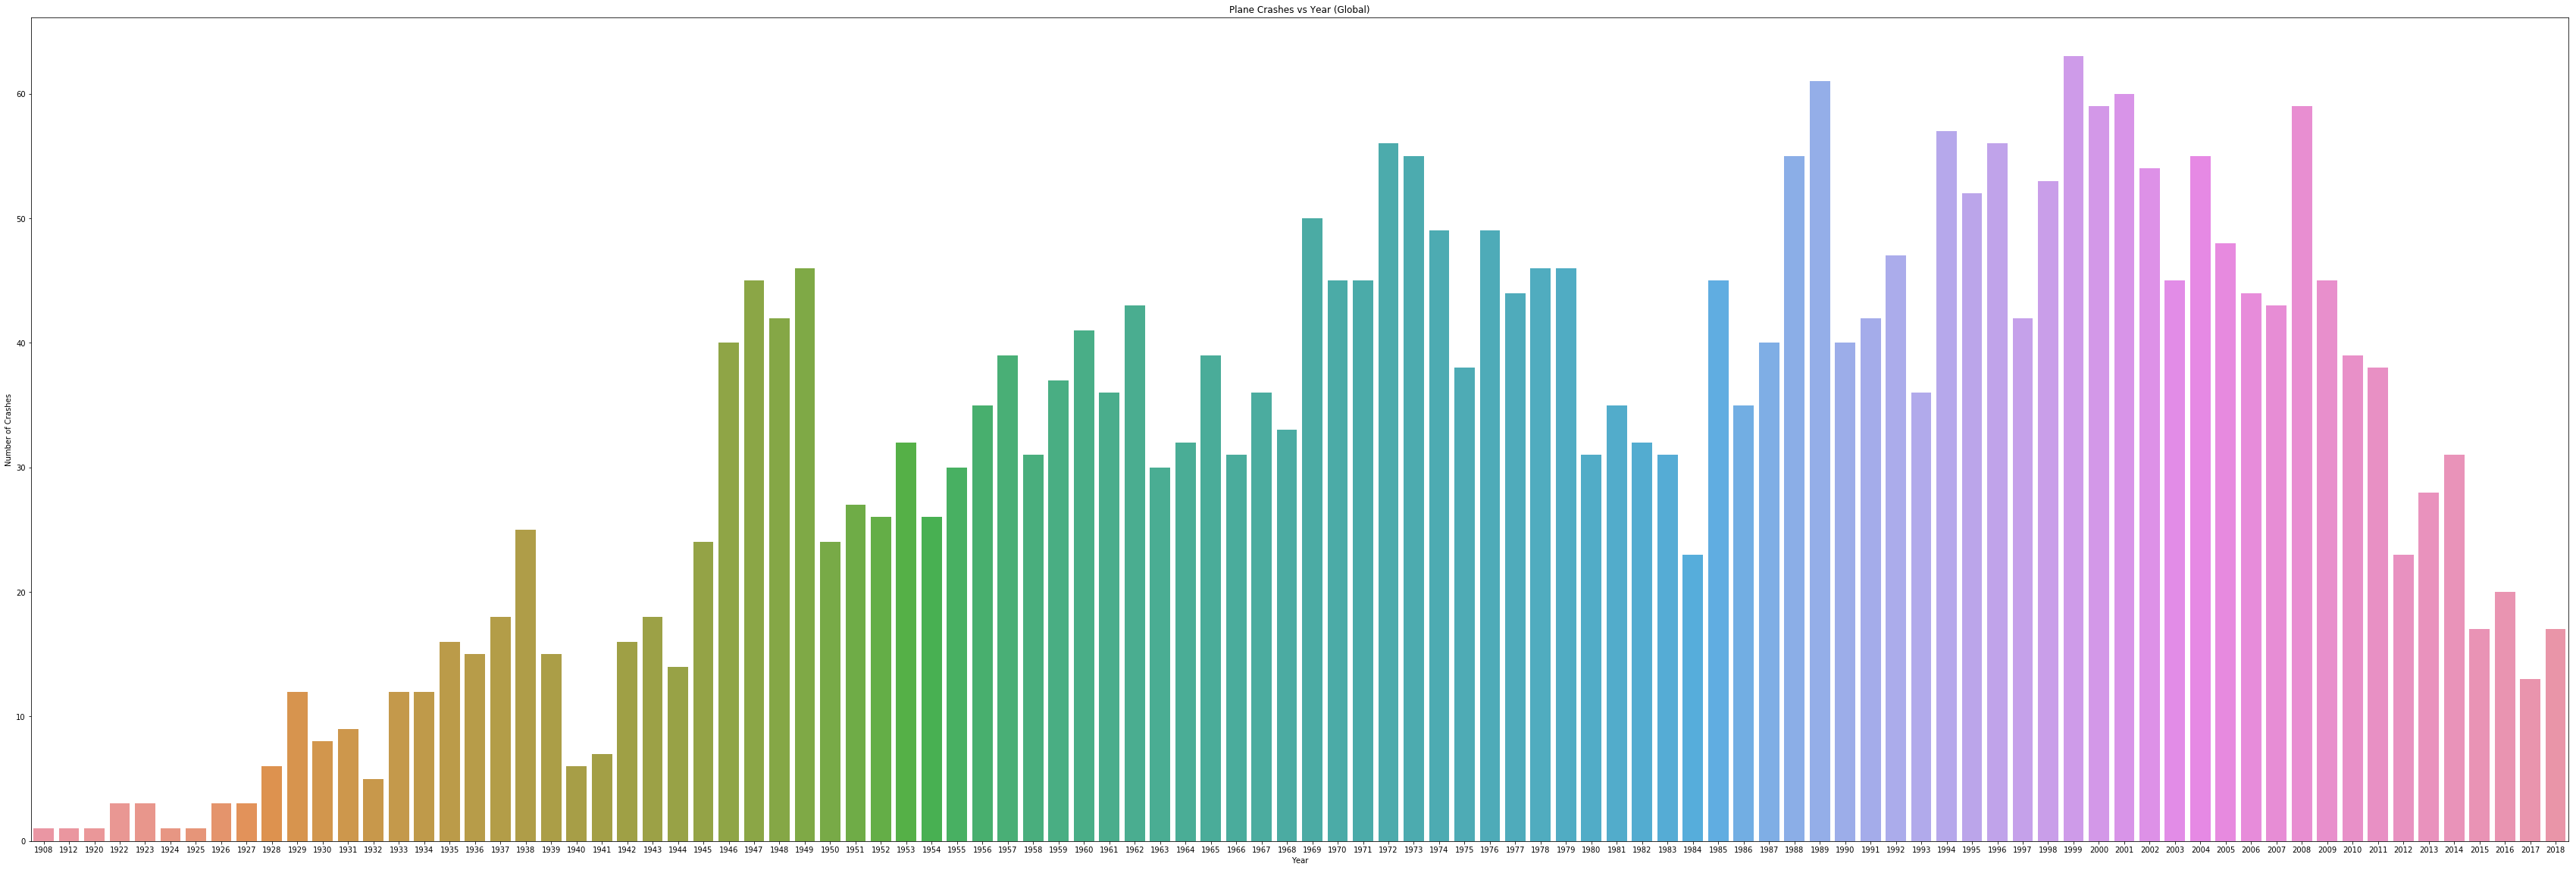

In [8]:
# Graph and label figure
fig, ax = plt.subplots(figsize=(60,20))
sns.barplot(x='year',y='counts',data=data_crashes_year)
plt.title('Plane Crashes vs Year (Global)')
plt.ylabel('Number of Crashes')
plt.xlabel('Year')
plt.show()


In [9]:
fatalities_list = []
for index, row in data.iterrows():
    fatalities_list.append(int(row['fatalities'].split(' ')[0]))
    
data['fatalities_count'] = pd.Series(fatalities_list).values

model_data = data
data_fatalities_year = data.groupby('year', sort=False)['fatalities_count'].sum().reset_index(name ='fatalities_count')
data_fatalities_year.head()










,year,fatalities_count
0,1908,1
1,1912,5
2,1920,4
3,1922,17
4,1923,63


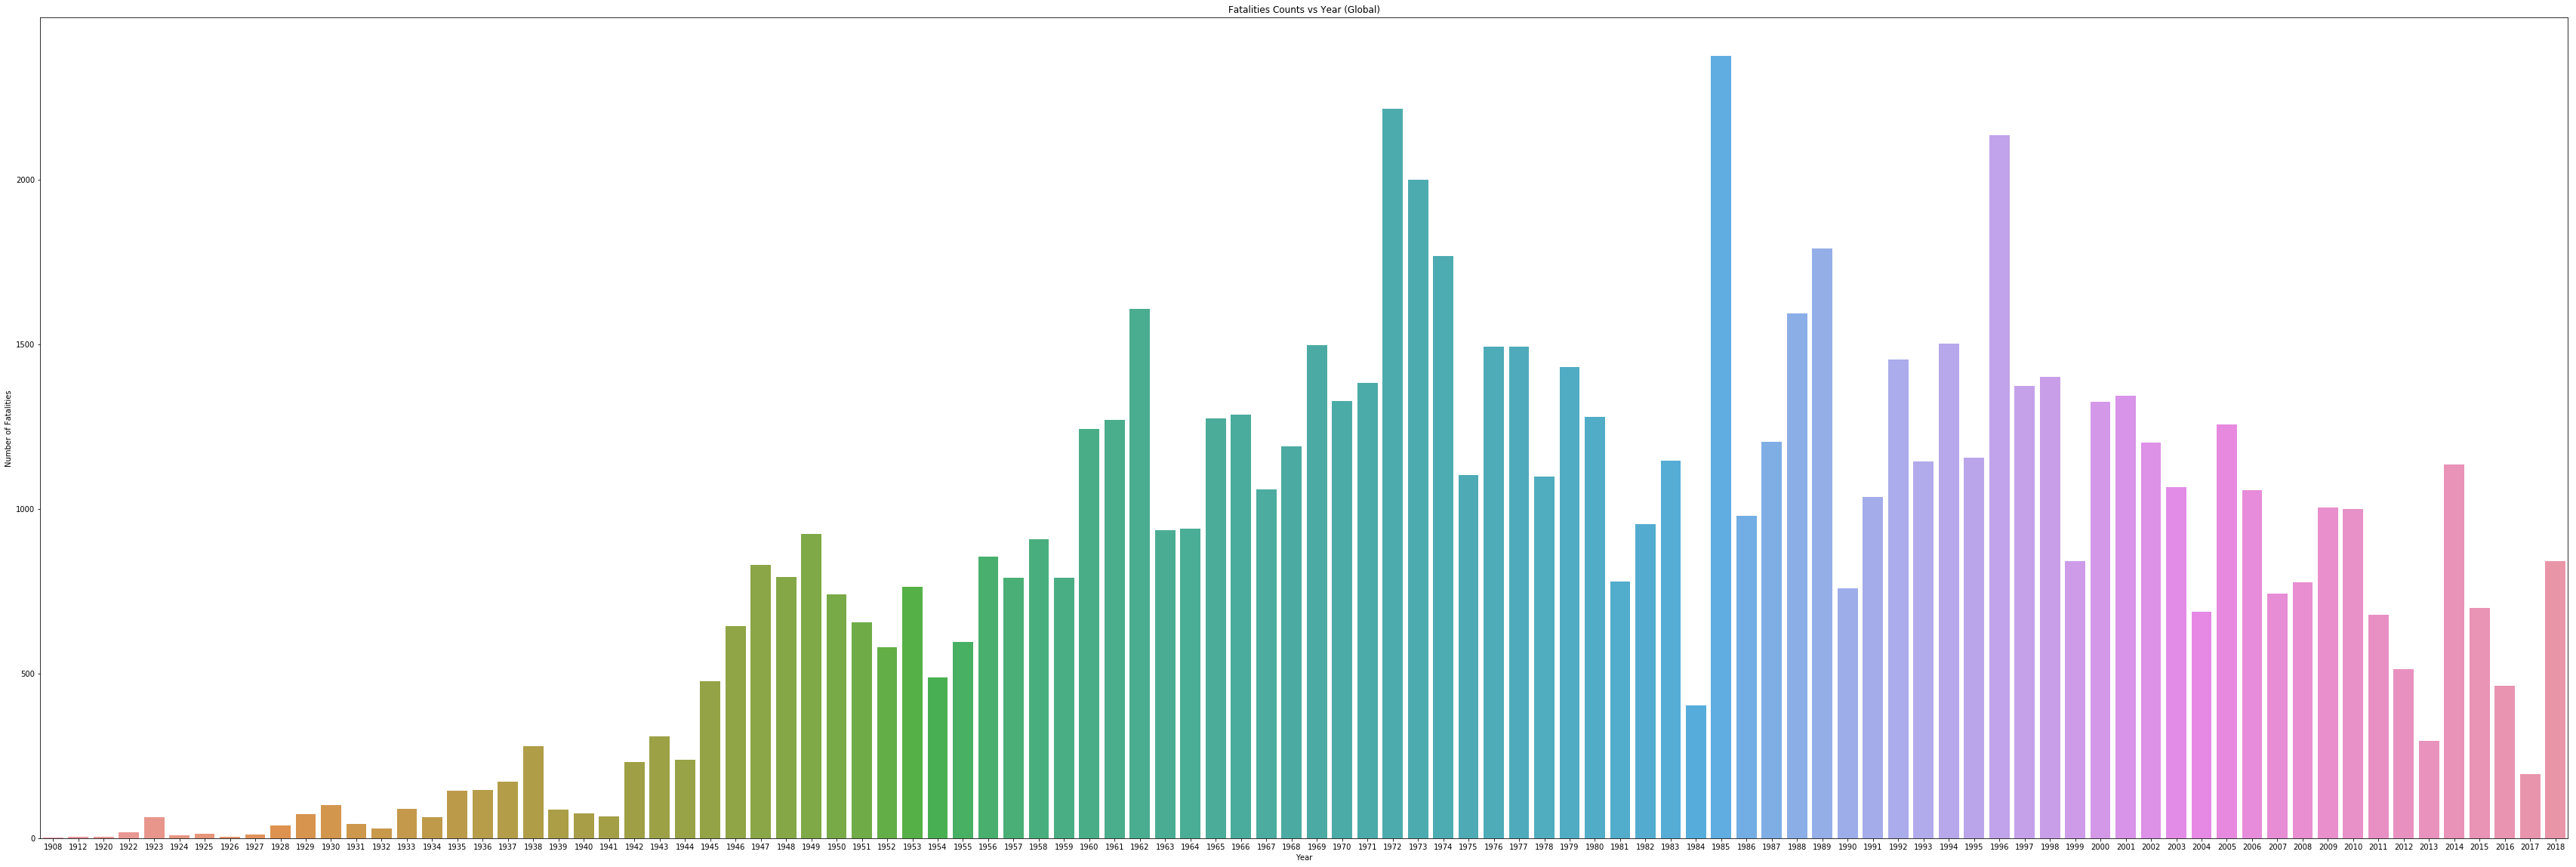

In [10]:
# Graph and label figure
fig, ax = plt.subplots(figsize=(60,20))
sns.barplot(x='year',y='fatalities_count',data=data_fatalities_year)
plt.title('Fatalities Counts vs Year (Global)')
plt.ylabel('Number of Fatalities')
plt.xlabel('Year')
plt.show()

In [11]:
data = read_data("modified_data.csv")
data.head()

,Unnamed: 0,time,location,operator,route,aircraft_type,aboard,fatalities,description,month,year,day,latitude,longitude
0,2459,21:08,"Off Abidjan, Ivory Coast",Kenya Airways,Abidjan - Lagos,AirbusA310-304,179 (passengers:169 crew:10),169 (passengers:159 crew:10),The aircraft crashed into the Atlantic Ocean t...,January,2000,30,5.320357,-4.016107
1,350,21:14,"Mt. Sanford, Alaska",Northwest Orient Airlines,Anchorage - New York City,Douglas DC-4 (C-54G-1-DO),30 (passengers:24 crew:6),30 (passengers:24 crew:6),"On a charter flight from Lunghwa Airport, Shan...",March,1948,12,62.213889,-144.128889
2,1341,19:30,"Off Saint Thomas, U.S. Virgin Islands",North Cay Airways,Saint Croix - Saint Thomas,Britten-Norman BN-2A Islander,2 (passengers:1 crew:1),2 (passengers:1 crew:1),Crashed into the ocean.,October,1974,2,NaN,NaN
3,550,17:03,"Near Mason City, Iowa",Braniff Airlines,Memphis - Minneapolis,Douglas DC-3,19 (passengers:16 crew:3),12 (passengers:10 crew:2),The aircraft crashed 16 miles south of Mason C...,August,1954,22,NaN,NaN
4,2696,13:38,"Panama City, Panama",Air Trek,"Panama City, Panama - Washington DC",IAI 1124 Westwind,6 (passengers:4 crew:2),6 (passengers:4 crew:2),After lifting off the runway the air ambulance...,July,2004,2,8.971449,-79.534180


In [12]:
heatmap_data = [data['latitude'].dropna(), data['longitude'].dropna()]
heatmap_data = np.rot90(heatmap_data, k=1)
heatmap_data = heatmap_data.tolist()

m = folium.Map([0.0, 0.0], tiles='stamentoner', zoom_start=2.0)
HeatMap(heatmap_data).add_to(m)
m

In [13]:
heatmap_data_month = data.dropna()
map = dict()
for index, row in heatmap_data_month.iterrows():
    if row['month'] in map.keys():
        map[row['month']].append([row['latitude'], row['longitude']])
    else:
        map[row['month']] = [[row['latitude'], row['longitude']]]


m = folium.Map([0.0, 0.0], tiles='stamentoner', zoom_start=1.7)
HeatMapWithTime(list(map.values()),auto_play=True).add_to(m)
m
                                                          


In [14]:
# US lat long info
top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat

data = data.dropna()            
data = data.loc[(data['latitude'] >= bottom) & (data['latitude'] <= top)]
data = data.loc[(data['longitude'] >= left) & (data['longitude'] <= right)]
heatmap_data_us = [data['latitude'], data['longitude']]
heatmap_data_us = np.rot90(heatmap_data_us, k=1)
heatmap_data_us = heatmap_data_us.tolist()

m = folium.Map([37.0902, -95.7129], tiles='stamentoner', zoom_start=4)
HeatMap(heatmap_data_us).add_to(m)
m
    

In [15]:
heatmap_data_month_us = data
map = dict()
for index, row in heatmap_data_month_us.iterrows():
    if row['month'] in map.keys():
        map[row['month']].append([row['latitude'], row['longitude']])
    else:
        map[row['month']] = [[row['latitude'], row['longitude']]]


m = folium.Map([37.0902, -95.7129], tiles='stamentoner', zoom_start=4)
HeatMapWithTime(list(map.values()),auto_play=True).add_to(m)
m

In [16]:
model_data.columns

Index(['time', 'location', 'operator', 'route', 'aircraft_type', 'aboard',
       'fatalities', 'description', 'month', 'year', 'day',
       'fatalities_count'],
      dtype='object')

In [17]:
# since the unique counts are very large we need to use hash encoding to avoid overfitting

In [18]:
len(model_data['aircraft_type'].unique())

1810

In [19]:
len(model_data['route'].unique())

2963

In [20]:
len(model_data['month'].unique()) # since this count is relatively less we can use one hot encoding

12

In [21]:
len(model_data['location'].unique())

2699

In [22]:
def one_hot_encoding(data=None, columns=None):
    '''
    one hot encoding for categorical data
    '''
    if data is None or columns is None:
        raise ValueError('Need Data and Columns as arguments !')
    data = data.copy()
    data = pd.concat([data, pd.get_dummies(data=data[columns], columns=columns)], axis=1)
    data.drop(columns, axis=1, inplace=True)
    return data





In [23]:
def hash_encoding(data=None, columns=None, n_features=5, input_type='string'):
    '''
     Hash Encoding for categorical data
    '''
    if data is None or columns is None or n_features is None or input_type is None:
        raise ValueError(
            'Need Data, Columns, n_features and  input_type as arguments !')
    data = data.copy()
    hasher = FeatureHasher(n_features, input_type)
    label_1 = [columns[0] + '_' + str(j) for j in range(0, n_features)]
    label_2 = [columns[1] + '_' + str(j) for j in range(0, n_features)]
    hashed = hasher.fit_transform(data[columns[0]])
    df = pd.DataFrame(hashed.toarray(), columns=label_1)
    data = pd.concat([data, df], axis=1)
    data.drop(columns[0], axis=1, inplace=True)
    hashed = hasher.fit_transform(data[columns[1]])
    df = pd.DataFrame(hashed.toarray(), columns=label_2)
    data = pd.concat([data, df], axis=1)
    data.drop(columns[1], axis=1, inplace=True)
    return data


In [24]:
def split_train_test_data(data=None, y_label=None, test_size=None, random_state=15):
    '''
    spilts data between training and validation and testing
    '''
    if data is None or y_label is None or test_size is None:
        raise ValueError('Need Data, Config map, Test size as arguments !')
    data = data.copy()
    y = data[y_label]
    X = data.drop(y_label, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, y_train, X_test, y_test

In [25]:
def calculate_error(X=None, y=None, model=None):
    '''
    returns rmse error for already fit model
    '''
    if X is None or y is None or model is None:
        raise ValueError('Need X, Y, Model as arguments !')
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    return rmse


In [26]:
# def residual_plot(X_train=None, y_train=None, X_test=None, y_test=None):
#     if X_train is None or y_train is None or X_test is None or y_test is None:
#         raise ValueError('Need X_train, y_train, X_test, y_test as arguments !')
#     model = LinearRegression(n_jobs=-1)
#     visualizer = ResidualsPlot(model)
#     visualizer.fit(X_train.values, y_train.values)
#     visualizer.score(X_test.values, y_test.values)
#     visualizer.show()
#     return None
    

In [27]:
model_data = model_data[['month', 'route', 'aircraft_type', 'fatalities_count']]
model_data = one_hot_encoding(model_data, 'month')
model_data = hash_encoding(model_data, ["route", "aircraft_type"])
X_train, y_train, X_test, y_test = split_train_test_data(model_data, 'fatalities_count', 0.3)



In [28]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
training_rmse = calculate_error(X_train, y_train, model)
print(training_rmse)
testing_rmse = calculate_error(X_test, y_test, model)
print(testing_rmse)

40.28846355921002
40.14481251434868


/usr/local/opt/pyenv/versions/3.6.5/envs/beautifulsoup-3.6.5/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [29]:
# residual_plot(X_train, y_train, X_test, y_test)